# Sketch2pic

## Overview
Product design is a multidisciplinary role that incorporates artistic vision, functional awareness, psychological insight, and market analysis.  For physical product design (e.g. shoes, apparel, or cars), the ability to envision a product in high detail and analyze its appeal is a crucial skill.  Once a compelling vision has been developed, a designer must also find a way, through words or painstaking artistic renderings, to communicate this vision to others in the company.

In their 2016 paper “Image-to-Image Translation with Conditional Adversarial Networks,” Philip Isola et al. present a methodology and architecture for generating a full-fledged photorealistic image based on some substrata or idealization of that image (e.g. a B&W image, map, or outline) using Conditional Generative Adversarial Networks (cGANs).  In this project, I will use the architecture they created to develop a tool for designers that I am calling Sketch2pic.  This tool takes a basic hand-drawn sketch of their product design and produces several photorealistic renderings of how that product might look once fully realized.  Such a tool could enhance the speed and specificity with which designers can brainstorm ideas – and it also has the potential to communicate their ideas quickly and compellingly to colleagues and supervisors.

## Sources
My primary source for this project will be the paper cited above.  In addition, I’ll be looking at the researchers’ Pytorch implementation on GitHub.  Since I’ll be using Tensorflow + Keras, I’ll also look at some Keras implementations of the “pix2pix” model (as it’s also called) by other machine learning practitioners.  The original U-net architecture paper, from which Phillipi et al derived their generator architecture, may also prove useful.

My data from this project will be UT’s Zappos dataset, which consists of 50,000 images of shoes.  This dataset was used as one of the example datasets in the original paper.

The techniques from the course that I’ll be using primarily comprise the “Neural Networks and Deep Learning” section in Unit 4 and the Unit 6 deep learning specialization.  However, I’ll also be drawing on training and validation best practices discussed throughout the supervised learning section.

## Potential Difficulties and Payoffs
I’m aware that the model I’m using is significantly more complicated than those discussed in the Thinkful deep learning specialization.  This will definitely present some challenges in structuring, debugging, and running the code (I have a GPU account set up at Floydhub, to yield the necessary computing power for the latter).  It will be a good learning experience, but not easy.  However, I’ve done quite a bit of research and read through several implementations, and my mentor and I have discussed the project and agree that it’s feasible for me – and will help me practice many important principles and techniques.  It’s particularly helpful that, while I intend to write all of my code from scratch, there are numerous implementations on GitHub that I can look to for concrete guidance.

I should also mention this won’t be sheerly a reimplementation of an existing model architecture: I do have a few functionalities that I hope to add or improve on.  In particular, as the design-focused usage case allows for multiple differing generated images to be equally useful (as opposed to photo restoration, where there is only one correct image), I hope to slightly modify the model to produce multiple images that differ significantly from each other.  This would allow me to explore a bit and produce some tweaks of my own that, while not necessarily wholly new, would at least show a potential employer some creative problem-solving.


## Load and examine data

Processing image 50067 of 50068
Elapsed time:  15.7 minutes
Image dimension errors:  8
50060 total images processed
(128, 128)


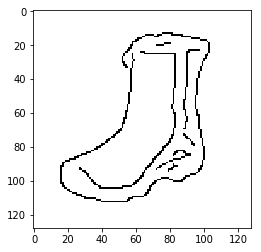

In [1]:
# standard imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

# DL imports
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model, Sequential
import glob
from data_loading import load_data

img_filenames = glob.glob('/floyd/input/ut_zappos50k/**/*.jpg', recursive=True)
img_pairs = load_data(img_filenames, 
                      cap=-1, 
                      min_complexity=450, 
                      max_complexity=750, 
                      verbose=True)

print(img_pairs[0][1].shape)
plt.imshow(img_pairs[0][1], cmap='gray');

## Split data for training

In [2]:
ct = len(img_pairs)
idx = list(range(ct))
np.random.shuffle(idx)
train_index, dev_index, test_index = idx[:-3000], idx[-3000:-1000], idx[-1000:]

train_img_pairs = [img_pairs[i] for i in train_index]
dev_img_pairs = [img_pairs[i] for i in dev_index]
test_img_pairs = [img_pairs[i] for i in test_index]

## Early attempts

## Full test

compiled discriminators
compiled generator
Running epoch 1 of 15...             
Running epoch 2 of 15...             
Running epoch 3 of 15...             
Running epoch 4 of 15...             
Running epoch 5 of 15...             
Running epoch 6 of 15...             
Running epoch 7 of 15...             
Running epoch 8 of 15...             
Running epoch 9 of 15...             
Running epoch 10 of 15...             
Running epoch 11 of 15...             
Running epoch 12 of 15...             
Running epoch 13 of 15...             
Running epoch 14 of 15...             
Running epoch 15 of 15...             
Training completed in 241 minutes             


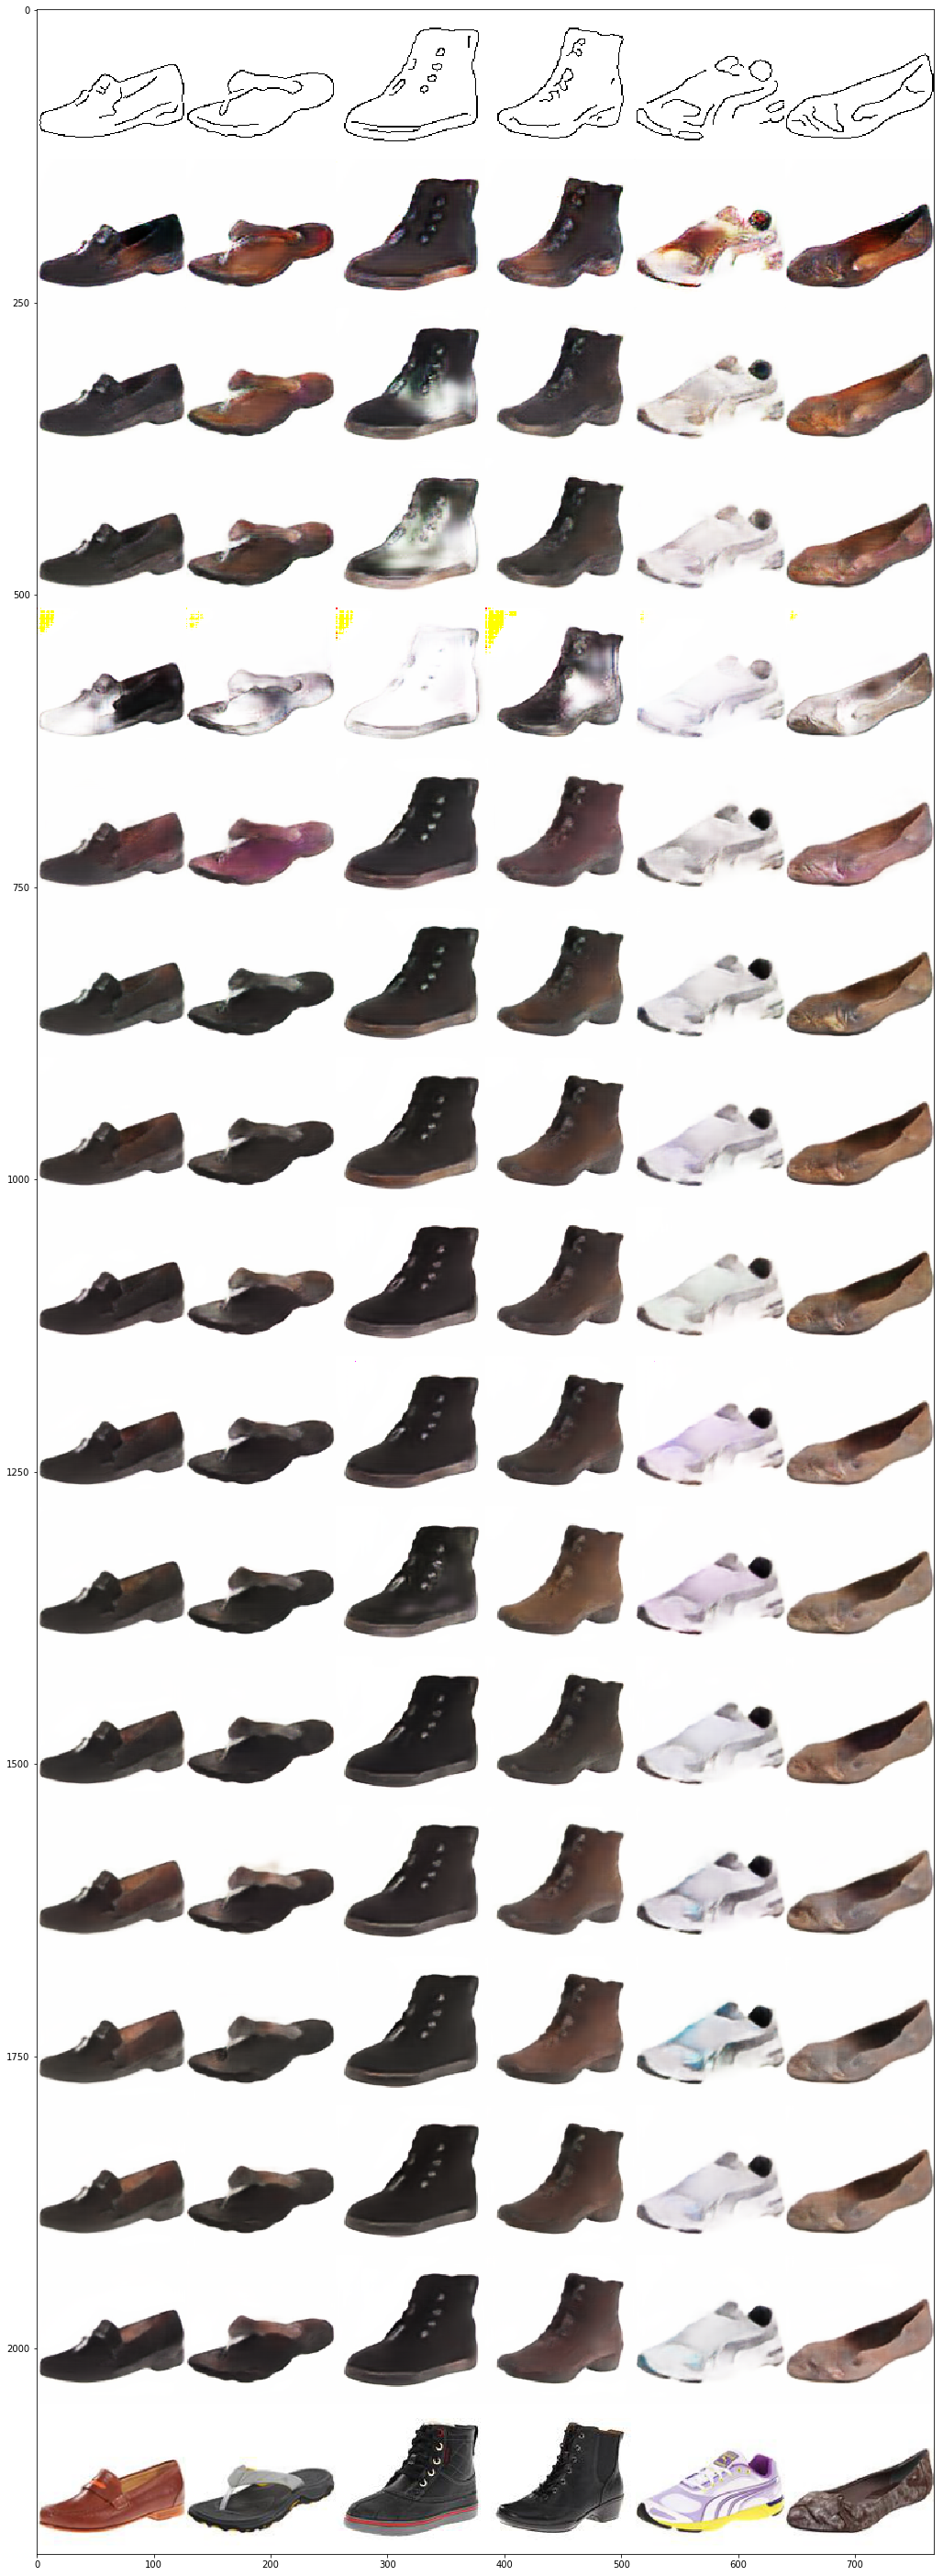

KeyError: 'disc_train_acc_real'

In [9]:
from cGAN_functions import sketch2pic
cGAN_1 = sketch2pic(name='seabiscuit', generator_activation='tanh')
cGAN_1.train(train_img_pairs, dev_img_pairs, batch_size=4, epochs=15)

cGAN_1.history.plot_examples(save=True)
cGAN_1.history.save_metrics()
cGAN_1.save_weights()
cGAN_1.history.return_metrics()

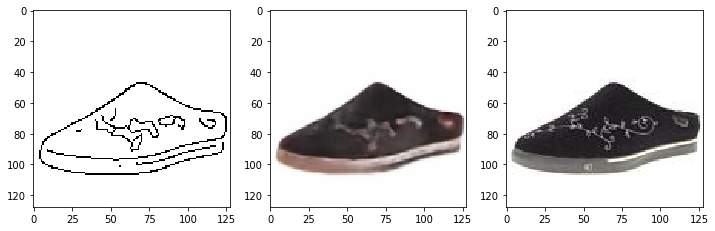

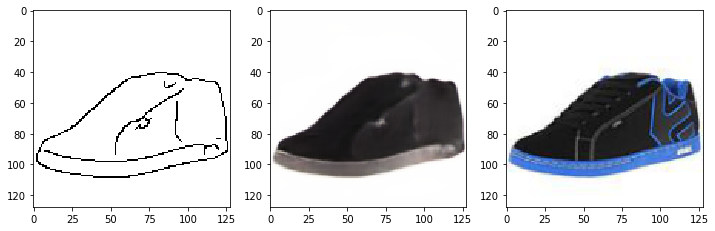

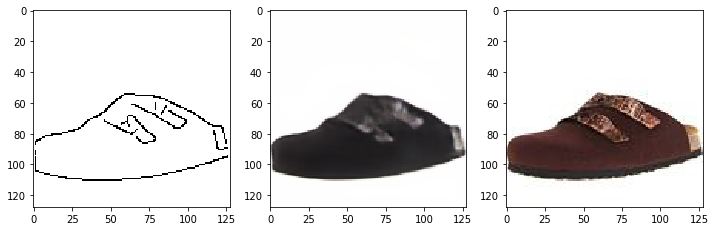

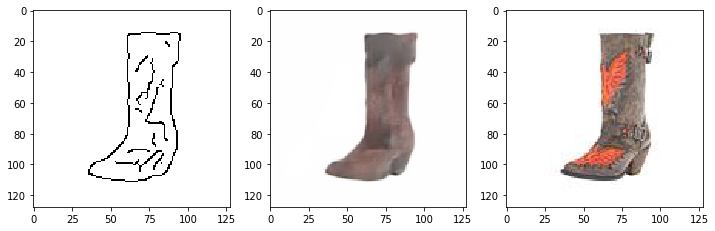

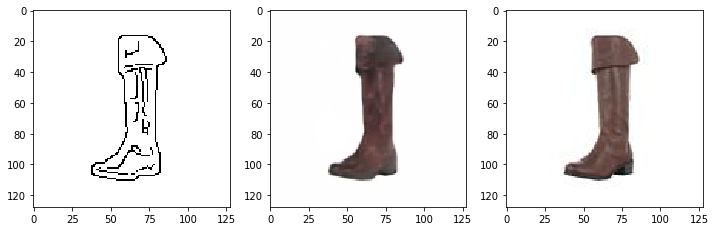

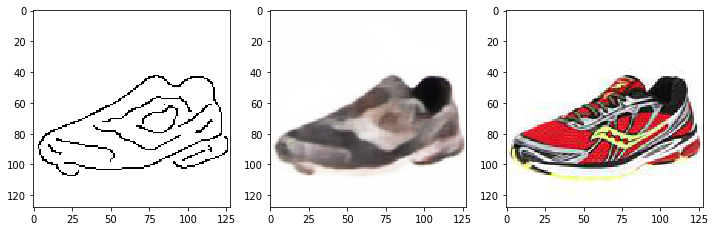

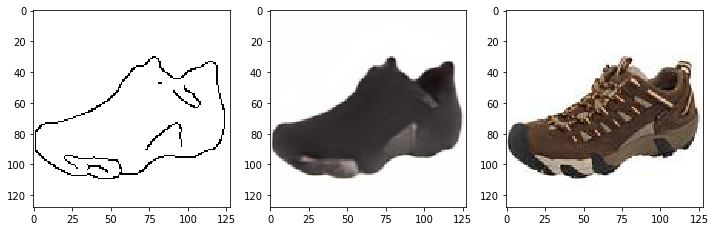

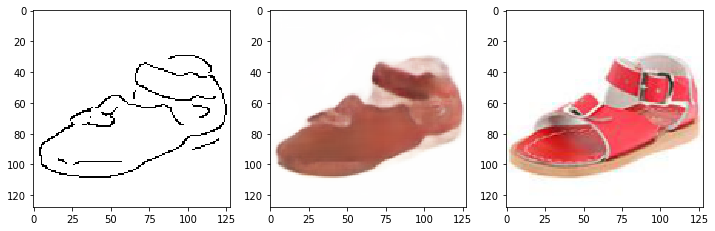

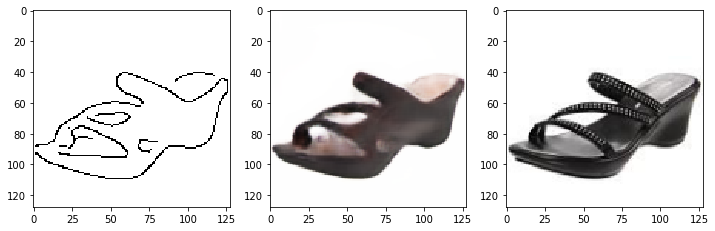

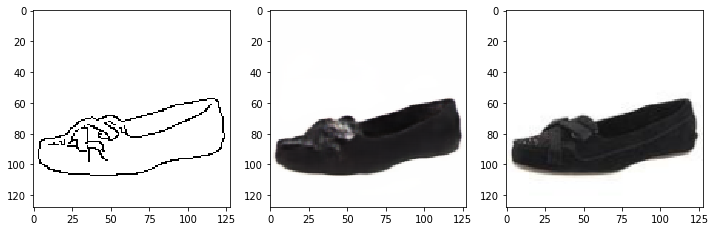

In [28]:
for i in range(10):
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(train_img_pairs[i][1], cmap='gray')
    plt.subplot(132)
    new = cGAN_1.image_from_sketch(train_img_pairs[i][1])
    plt.imshow(new)
    plt.subplot(133)
    plt.imshow(train_img_pairs[i][0])
    plt.show()

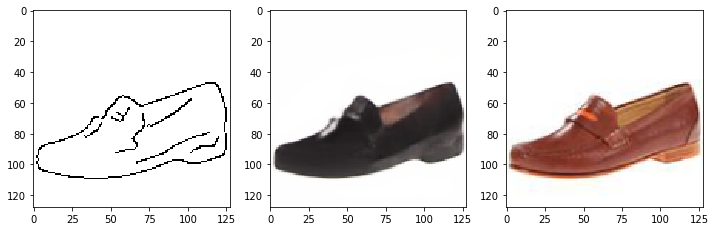

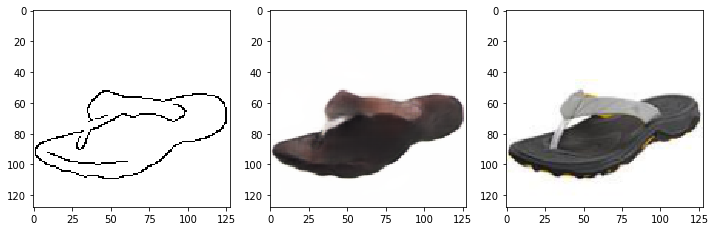

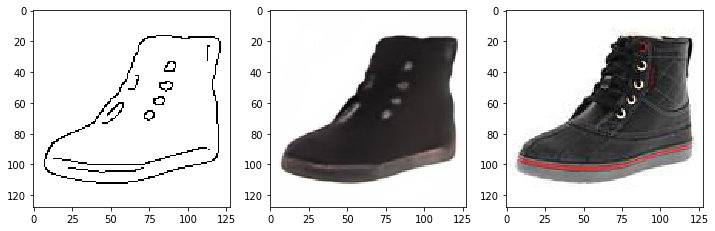

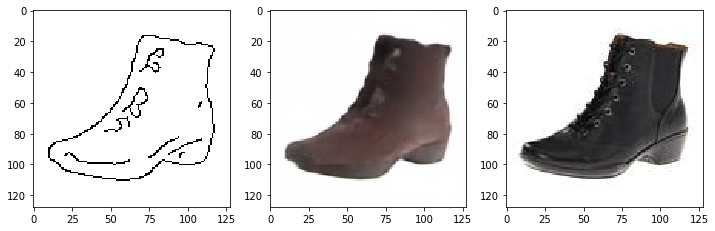

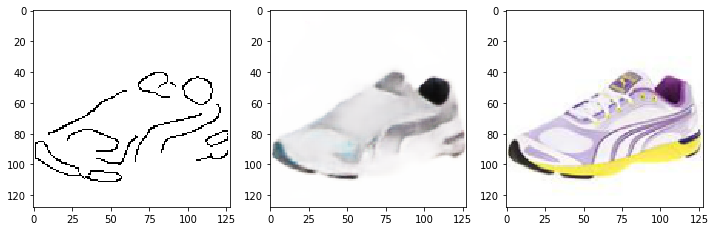

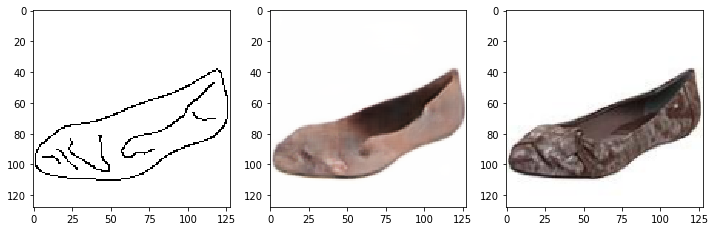

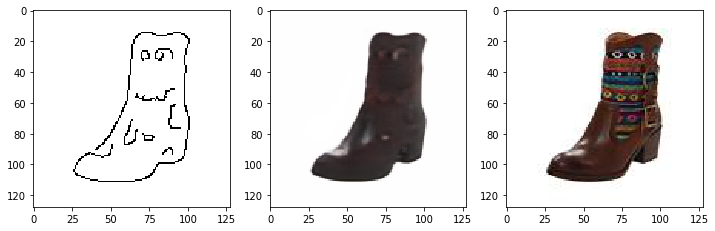

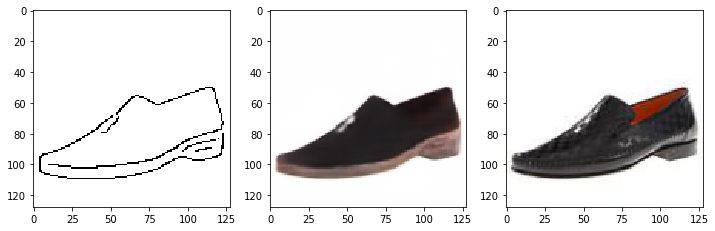

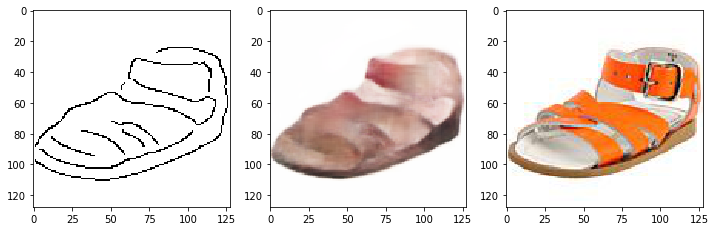

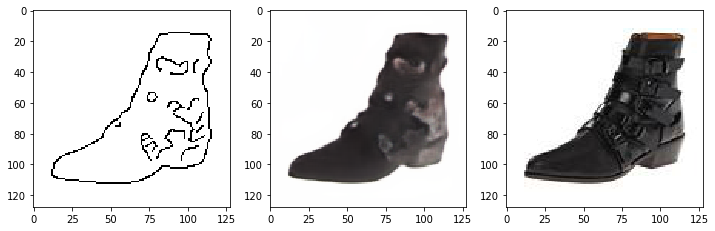

In [29]:
for i in range(10):
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(dev_img_pairs[i][1], cmap='gray')
    plt.subplot(132)
    new = cGAN_1.image_from_sketch(dev_img_pairs[i][1])
    plt.imshow(new)
    plt.subplot(133)
    plt.imshow(dev_img_pairs[i][0])
    plt.show()

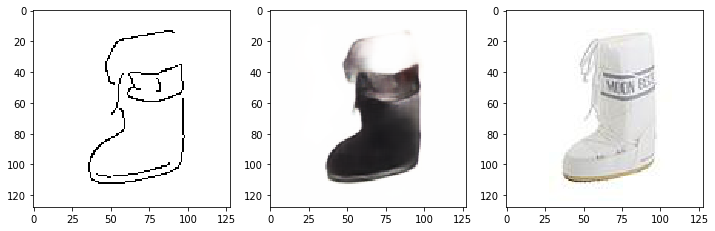

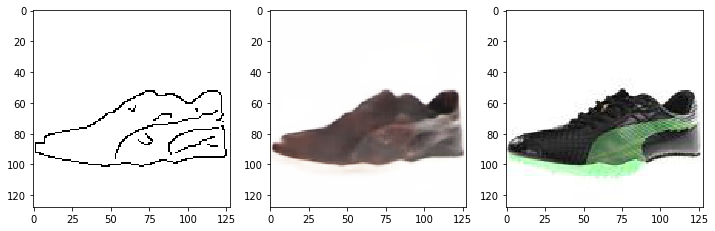

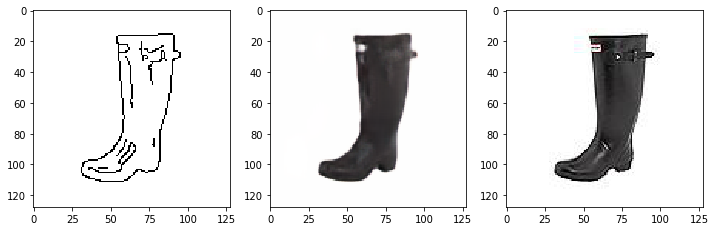

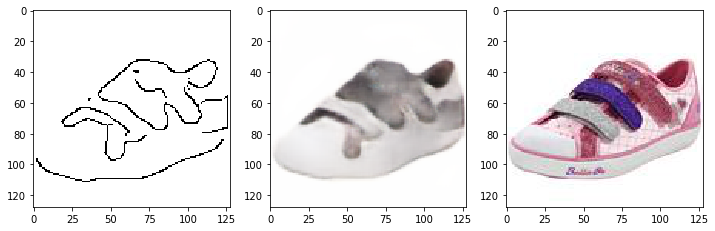

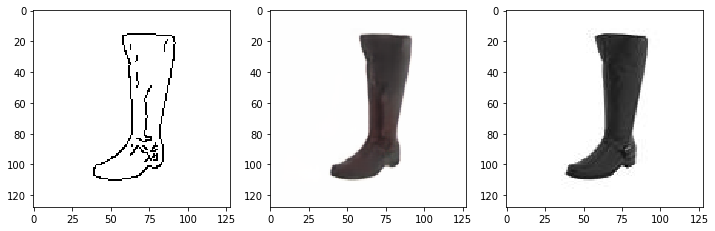

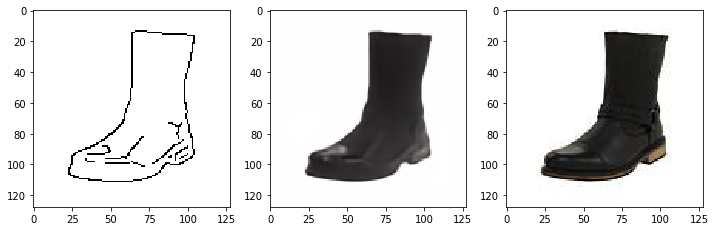

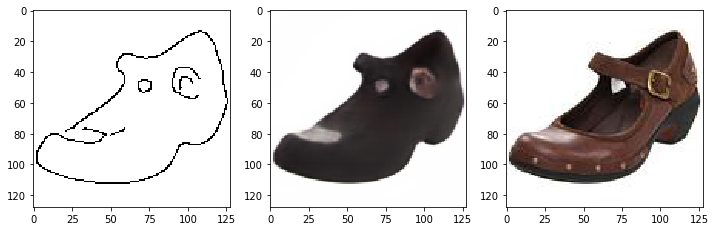

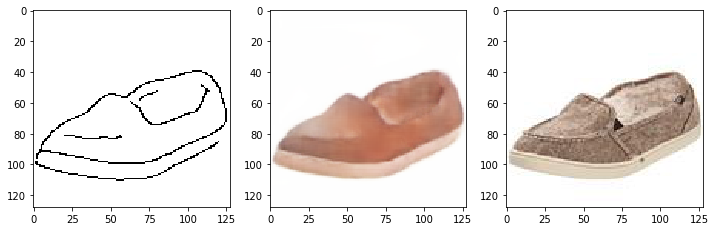

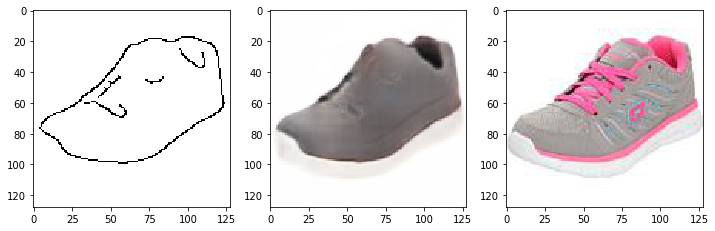

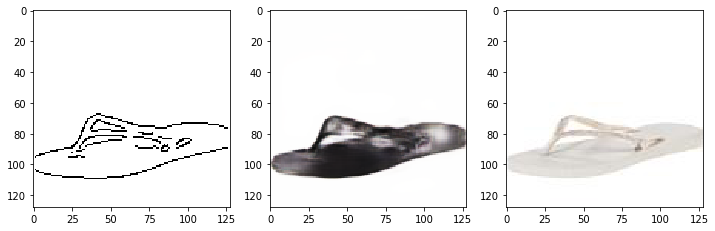

In [30]:
for i in range(10):
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(test_img_pairs[i][1], cmap='gray')
    plt.subplot(132)
    new = cGAN_1.image_from_sketch(test_img_pairs[i][1])
    plt.imshow(new)
    plt.subplot(133)
    plt.imshow(test_img_pairs[i][0])
    plt.show()

## Test template

compiled discriminators
compiled generator
Running epoch 1 of 4...             
Running epoch 2 of 4...             
Running epoch 3 of 4...             
Running epoch 4 of 4...             
Training completed in 64 minutes             


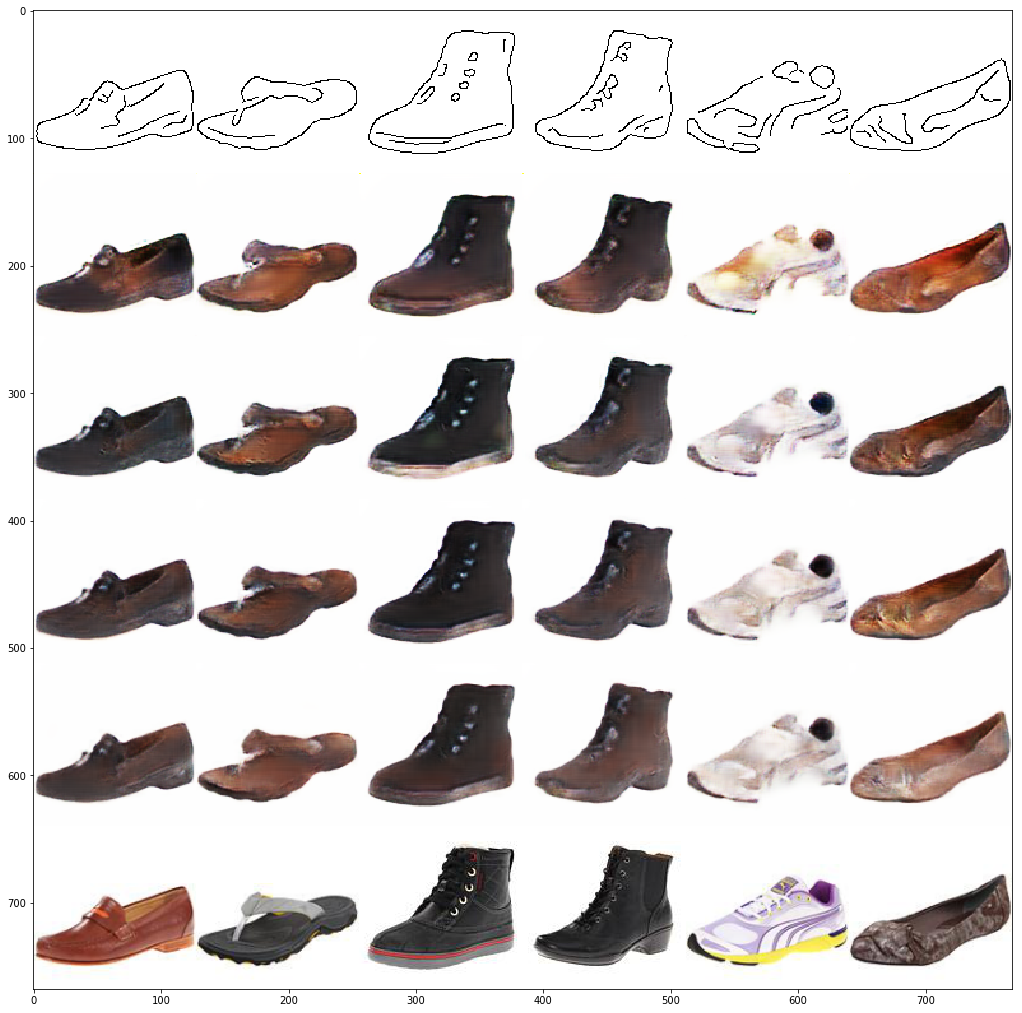

AttributeError: 'sketch2pic' object has no attribute 'discriminator_trainable'

In [6]:
from cGAN_functions import sketch2pic
cGAN = sketch2pic(name='full_run_opt', generator_activation='tanh')
cGAN.train(train_img_pairs, dev_img_pairs, batch_size=4, epochs=4)

cGAN.history.plot_examples(save=True)
cGAN.history.save_metrics()
cGAN.save_weights()
cGAN.history.return_metrics()

## Tests

In [2]:
from cGAN_functions_opt import sketch2pic
cGAN = sketch2pic(name='full_run_opt', generator_activation='tanh')
cGAN.train(img_pairs[:100], img_pairs[:50], batch_size=4, epochs=4)

cGAN.history.plot_examples(save=True)
cGAN.history.save_metrics()
cGAN.save_weights()
cGAN.history.return_metrics()

compiled discriminators


AttributeError: 'sketch2pic' object has no attribute 'discriminator_component'